### Importación de datos



In [7]:
# En Colab, instala seaborn
#!pip install seaborn



In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns


# Aplica el tema seaborn
sns.set_theme(style='darkgrid')

url1 = "/content/tienda_1.csv"
url2 = "/content/tienda_2.csv"
url3 = "/content/tienda_3.csv"
url4 = "/content/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


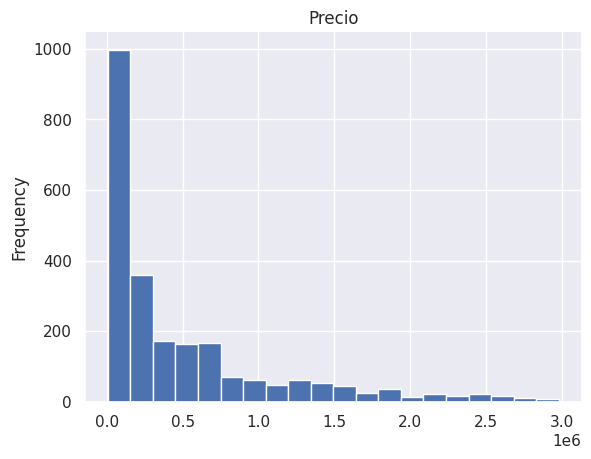

In [9]:
# @title Precio

from matplotlib import pyplot as plt
tienda1['Precio'].plot(kind='hist', bins=20, title='Precio')
plt.gca().spines[['top', 'right',]].set_visible(False)

#1. Análisis de facturación



  tienda        Ventas Costos_envío    Venta_Neta
tienda 1 1.150.880.400   61.377.900 1.089.502.500
tienda 2 1.116.343.500   59.485.100 1.056.858.400
tienda 3 1.098.019.600   58.516.600 1.039.503.000
tienda 4 1.038.375.700   55.317.400   983.058.300


/tmp/ipython-input-2845930437.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-2845930437.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-2845930437.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


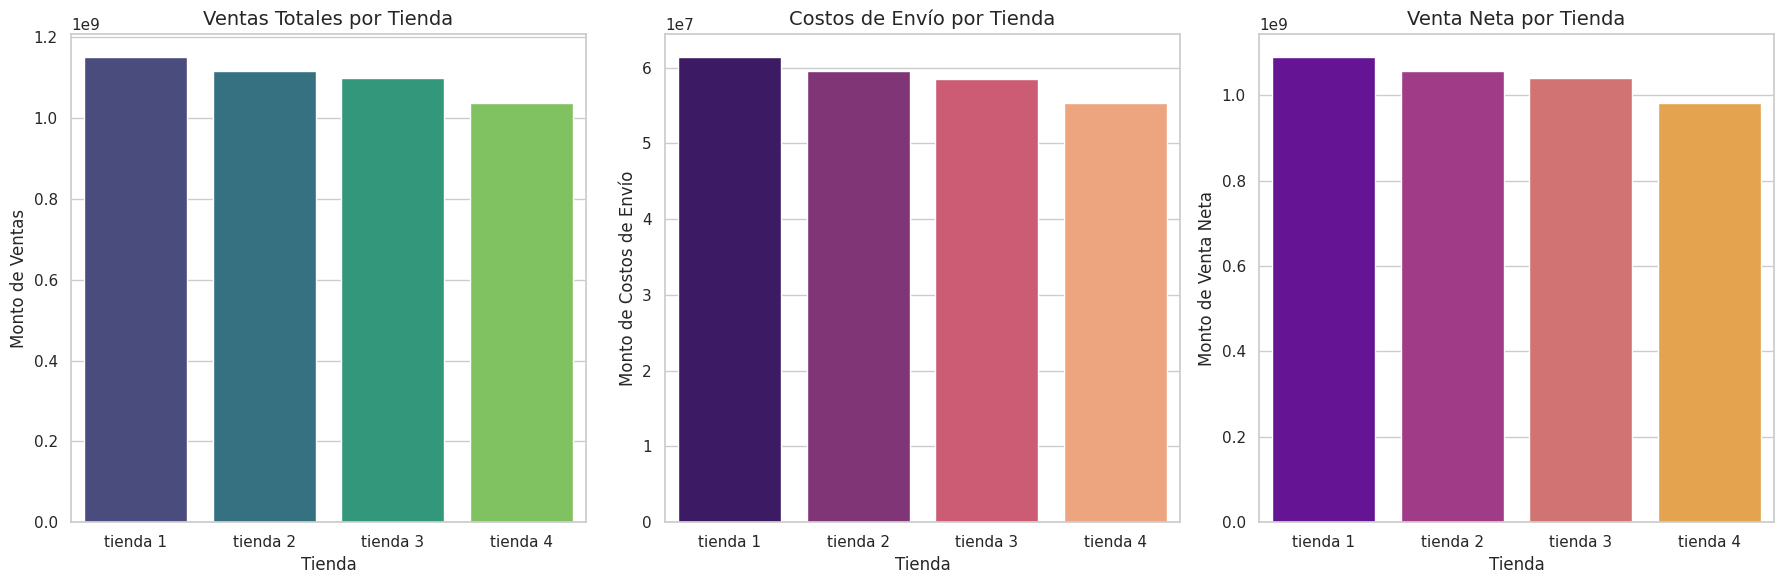

In [18]:
# 1. Añadir columna 'tienda' a cada DataFrame
tienda1['tienda'] = 'tienda 1'
tienda2['tienda'] = 'tienda 2'
tienda3['tienda'] = 'tienda 3'
tienda4['tienda'] = 'tienda 4'

# 2. Concatenar todos los registros en un solo DataFrame
df_consolidado = pd.concat(
    [tienda1, tienda2, tienda3, tienda4],
    ignore_index=True
)

# 3. Agrupar por tienda y sumar los precios de venta y los costos de envio
resumen_ventas = (
    df_consolidado
    .groupby('tienda', as_index=False)
    .agg(
        Ventas=('Precio', 'sum'),
        Costos_envío=('Costo de envío', 'sum')
    )
)

# 4. Calcular diferencia (ventas menos costos de envío)
resumen_ventas['Venta_Neta'] = resumen_ventas['Ventas'] - resumen_ventas['Costos_envío']

# 5. Función para formatear sin decimales y con punto de miles
def fmt_sin_dec(x):
    s = f"{x:,.0f}"      # e.g. 1234567 → "1,234,567"
    s = s.replace(",", "X")
    s = s.replace(".", ",")
    s = s.replace("X", ".")
    return s

# 6. Aplicar formato a las tres columnas numéricas
for col in ['Ventas', 'Costos_envío', 'Venta_Neta']:
    resumen_ventas[col] = resumen_ventas[col].apply(fmt_sin_dec)

# 7. Mostrar el resultado
print(resumen_ventas.to_string(index=False))

# 8. Visualizar los resultados con gráficos de barras

# Convertir las columnas a numérico para graficar (removiendo formato)
resumen_ventas_plot = resumen_ventas.copy()
for col in ['Ventas', 'Costos_envío', 'Venta_Neta']:
    resumen_ventas_plot[col] = resumen_ventas_plot[col].str.replace('.', '').str.replace(',', '.').astype(float)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico de Ventas
sns.barplot(
    ax=axes[0],
    data=resumen_ventas_plot,
    x='tienda',
    y='Ventas',
    palette='viridis'
)
axes[0].set_title('Ventas Totales por Tienda', fontsize=14)
axes[0].set_xlabel('Tienda', fontsize=12)
axes[0].set_ylabel('Monto de Ventas', fontsize=12)

# Gráfico de Costos de Envío
sns.barplot(
    ax=axes[1],
    data=resumen_ventas_plot,
    x='tienda',
    y='Costos_envío',
    palette='magma'
)
axes[1].set_title('Costos de Envío por Tienda', fontsize=14)
axes[1].set_xlabel('Tienda', fontsize=12)
axes[1].set_ylabel('Monto de Costos de Envío', fontsize=12)

# Gráfico de Venta Neta
sns.barplot(
    ax=axes[2],
    data=resumen_ventas_plot,
    x='tienda',
    y='Venta_Neta',
    palette='plasma'
)
axes[2].set_title('Venta Neta por Tienda', fontsize=14)
axes[2].set_xlabel('Tienda', fontsize=12)
axes[2].set_ylabel('Monto de Venta Neta', fontsize=12)

plt.tight_layout()
plt.show()

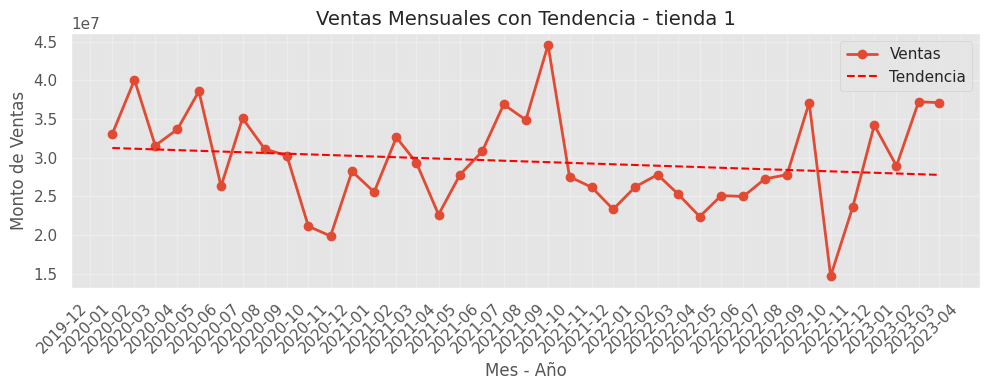

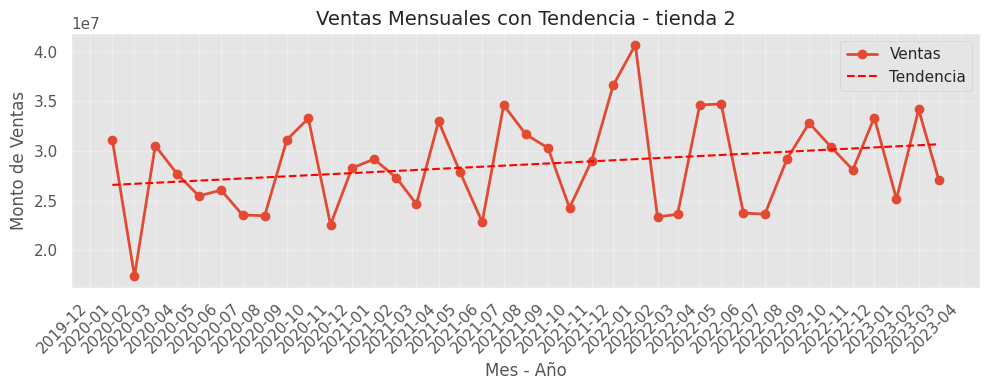

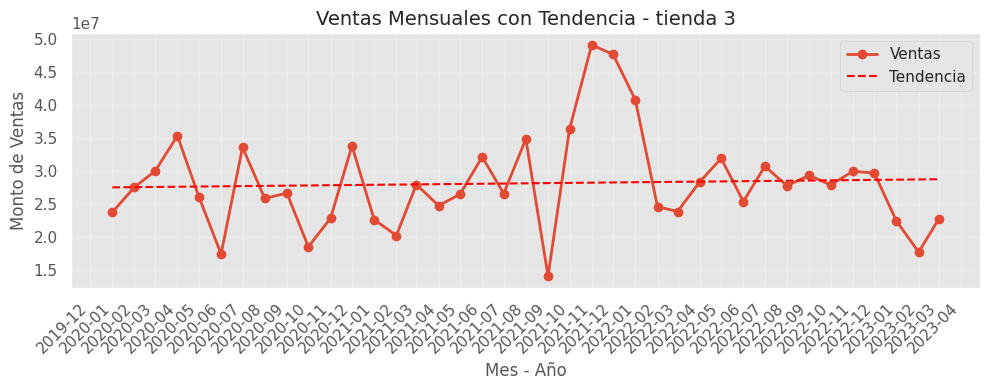

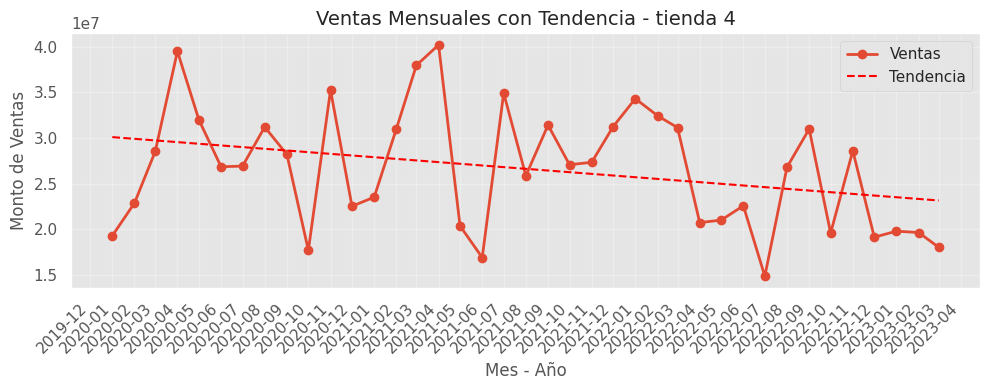

In [11]:
# 8. Convertir 'Fecha de Compra' a datetime
df_consolidado['Fecha de Compra'] = pd.to_datetime(df_consolidado['Fecha de Compra'], dayfirst=True, errors='coerce')

# 9. Agrupar por tienda y mes-año, sumando Precio
ventas_mensuales = (
    df_consolidado
    .set_index('Fecha de Compra')
    .groupby(['tienda', pd.Grouper(freq='ME')])['Precio']
    .sum()
    .reset_index()
)

# 10. Formatear la columna de fecha para mostrar año-mes en el eje
ventas_mensuales['Mes_Año'] = ventas_mensuales['Fecha de Compra'].dt.to_period('M').dt.to_timestamp()

# 11. Graficar con tendencia
plt.style.use('ggplot')

for tienda in ventas_mensuales['tienda'].unique():
    datos = ventas_mensuales[ventas_mensuales['tienda'] == tienda]
    fechas = datos['Mes_Año']
    ventas = datos['Precio']

    # Convertir fechas a números para polyfit
    x_num = mdates.date2num(fechas)
    # Coeficientes (pendiente m y ordenada b)
    m, b = np.polyfit(x_num, ventas, 1)

    fig, ax = plt.subplots(figsize=(10, 4))
    # Línea de datos
    ax.plot(fechas, ventas, marker='o', linewidth=2, label='Ventas')
    # Línea de tendencia
    ax.plot(fechas, m * x_num + b, color='red', linestyle='--', label='Tendencia')

    # Formato eje X
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    plt.xticks(rotation=45, ha='right')

    ax.set_title(f'Ventas Mensuales con Tendencia - {tienda}', fontsize=14)
    ax.set_xlabel('Mes - Año', fontsize=12)
    ax.set_ylabel('Monto de Ventas', fontsize=12)
    ax.legend()
    ax.grid(alpha=0.3)

    plt.tight_layout()
    plt.show()

# 2. Ventas por categoría

/tmp/ipython-input-1570427141.py:11: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df = pd.read_csv(


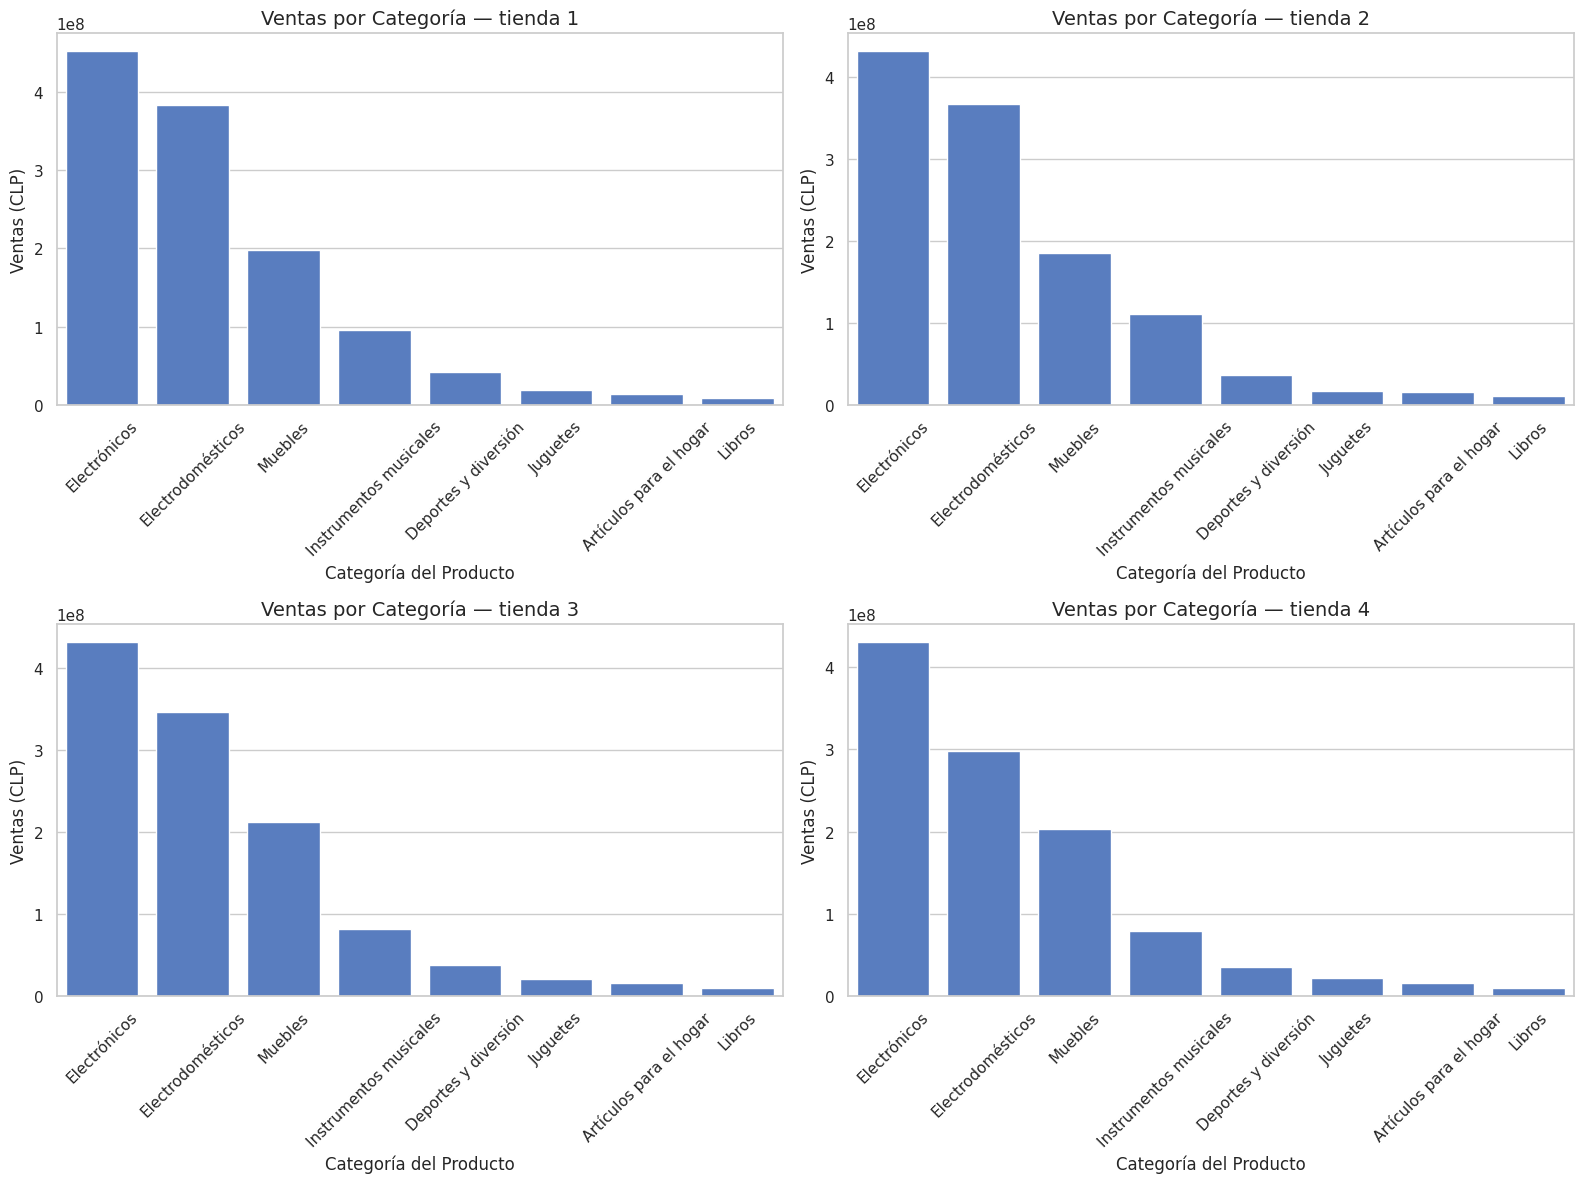

In [12]:
# 1. Librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mejor estilo
sns.set(style="whitegrid", palette="muted")

# 2. Carga de datos
# Asegúrate de haber subido df_consolidado.csv a tu entorno de Colab
df = pd.read_csv(
    'df_consolidado.csv',
    parse_dates=['Fecha de Compra'],
    dayfirst=True
)

# 3. Crear columna de ventas totales
df['Ventas'] = df['Precio'] + df['Costo de envío']

# 4. Listado de tiendas únicas
tiendas = df['tienda'].unique()

# 5. Preparar subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# 6. Generar un gráfico por cada tienda
for ax, tienda in zip(axes, tiendas):
    df_t = df[df['tienda'] == tienda]

    # Agrupar y ordenar categorías por ventas
    ventas_por_cat = (
        df_t
        .groupby('Categoría del Producto')['Ventas']
        .sum()
        .reset_index()
        .sort_values('Ventas', ascending=False)
    )

    # Gráfico de barras
    sns.barplot(
        x='Categoría del Producto',
        y='Ventas',
        data=ventas_por_cat,
        ax=ax
    )

    # Personalización
    ax.set_title(f'Ventas por Categoría — {tienda}', fontsize=14)
    ax.set_xlabel('Categoría del Producto', fontsize=12)
    ax.set_ylabel('Ventas (CLP)', fontsize=12)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


     tienda  Calificación
2  tienda 3      4.048326
1  tienda 2      4.037304
3  tienda 4      3.995759
0  tienda 1      3.976685


/tmp/ipython-input-1444099930.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


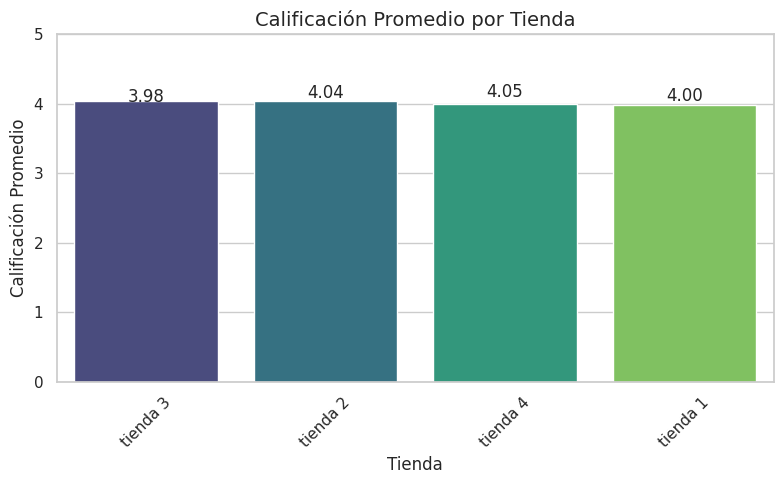

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo de los gráficos
sns.set(style="whitegrid", palette="muted")

# 1. Calcular promedio de calificaciones por tienda
promedio_calificaciones = (
    df_consolidado
    .groupby('tienda')['Calificación']
    .mean()
    .reset_index()
    .sort_values(by='Calificación', ascending=False)
)

# 2. Mostrar resultados
print(promedio_calificaciones)

# 3. Gráfico de barras
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    x='tienda',
    y='Calificación',
    data=promedio_calificaciones,
    palette='viridis'
)

# Personalización
ax.set_title('Calificación Promedio por Tienda', fontsize=14)
ax.set_xlabel('Tienda', fontsize=12)
ax.set_ylabel('Calificación Promedio', fontsize=12)
ax.set_ylim(0, 5)
plt.xticks(rotation=45)

# Añadir etiquetas encima de las barras
for idx, row in promedio_calificaciones.iterrows():
    ax.text(
        idx,
        row['Calificación'] + 0.05,
        f"{row['Calificación']:.2f}",
        ha='center'
    )

plt.tight_layout()
plt.show()


# 4. Productos más y menos vendidos

/tmp/ipython-input-2656757712.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(1, 'Cantidad Vendida'))
/tmp/ipython-input-2656757712.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nsmallest(1, 'Cantidad Vendida'))
/tmp/ipython-input-2656757712.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.

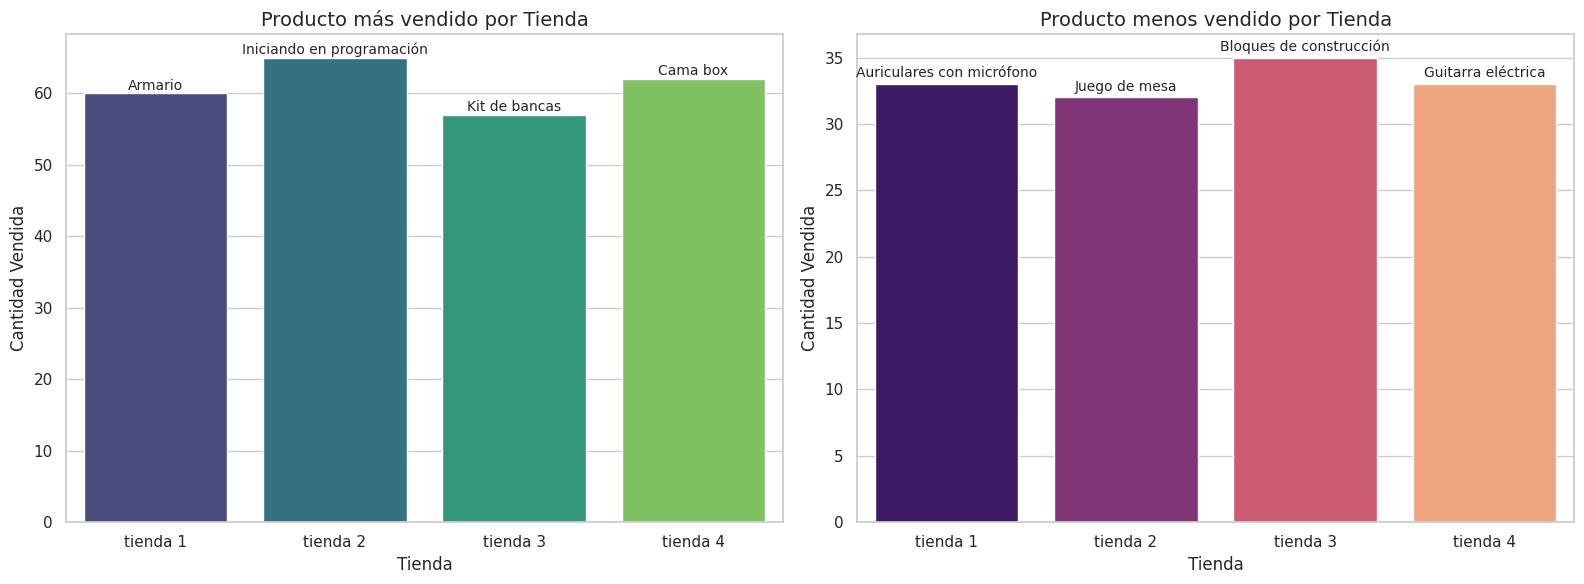

In [14]:
sns.set(style="whitegrid", palette="muted")

# Contar cuántas veces aparece cada producto en cada tienda
ventas_producto = (
    df_consolidado
    .groupby(['tienda', 'Producto'])
    .size()
    .reset_index(name='Cantidad Vendida')
)

# Identificar producto más y menos vendido por tienda
most_sold = (
    ventas_producto
    .groupby('tienda')
    .apply(lambda x: x.nlargest(1, 'Cantidad Vendida'))
    .reset_index(drop=True)
)

least_sold = (
    ventas_producto
    .groupby('tienda')
    .apply(lambda x: x.nsmallest(1, 'Cantidad Vendida'))
    .reset_index(drop=True)
)

# Visualizar en subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Producto más vendido
sns.barplot(
    ax=axes[0],
    data=most_sold,
    x='tienda',
    y='Cantidad Vendida',
    palette='viridis'
)
axes[0].set_title('Producto más vendido por Tienda', fontsize=14)
axes[0].set_xlabel('Tienda', fontsize=12)
axes[0].set_ylabel('Cantidad Vendida', fontsize=12)
for idx, row in most_sold.iterrows():
    axes[0].text(
        idx,
        row['Cantidad Vendida'] + 0.5,
        row['Producto'],
        ha='center',
        fontsize=10
    )

# Producto menos vendido
sns.barplot(
    ax=axes[1],
    data=least_sold,
    x='tienda',
    y='Cantidad Vendida',
    palette='magma'
)
axes[1].set_title('Producto menos vendido por Tienda', fontsize=14)
axes[1].set_xlabel('Tienda', fontsize=12)
axes[1].set_ylabel('Cantidad Vendida', fontsize=12)
for idx, row in least_sold.iterrows():
    axes[1].text(
        idx,
        row['Cantidad Vendida'] + 0.5,
        row['Producto'],
        ha='center',
        fontsize=10
    )

plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

In [15]:
# Agrupar por tienda y calcular el costo de envío promedio
costo_envio_promedio = (
    df_consolidado
    .groupby('tienda')['Costo de envío']
    .mean()
    .reset_index()
)

# Renombrar columna para mayor claridad
costo_envio_promedio.rename(
    columns={'Costo de envío': 'costo_envio_promedio'},
    inplace=True
)

# Mostrar la tabla de resultados
print(costo_envio_promedio)


     tienda  costo_envio_promedio
0  tienda 1          26018.609580
1  tienda 2          25216.235693
2  tienda 3          24805.680373
3  tienda 4          23459.457167


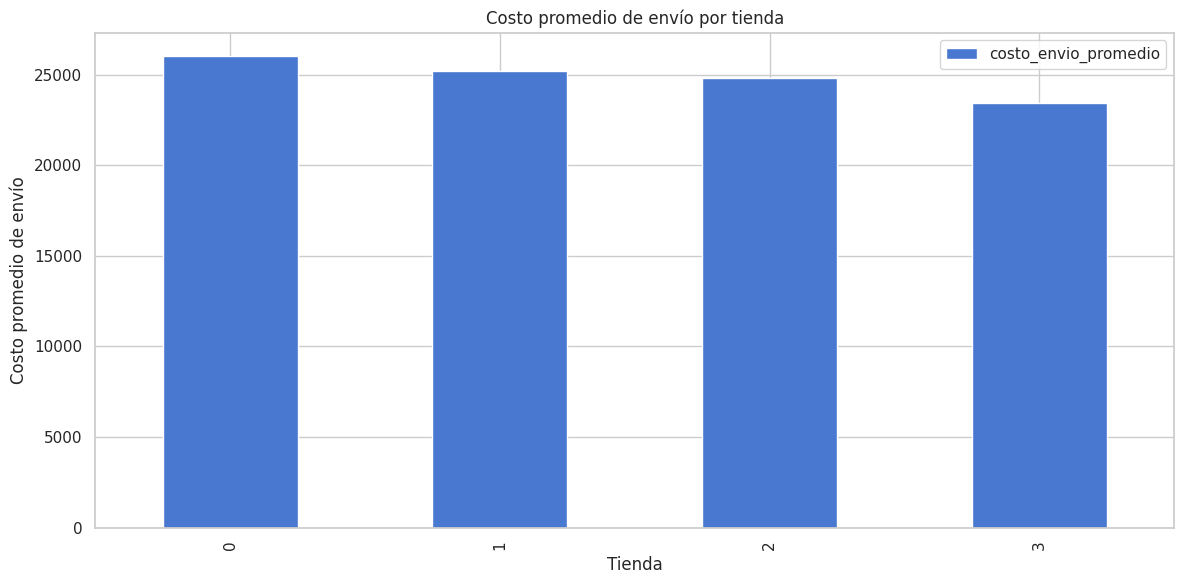

In [17]:
import matplotlib.pyplot as plt

costo_envio_promedio.plot(kind='bar', figsize=(12,6), title='Costo promedio de envío por tienda')
plt.ylabel('Costo promedio de envío')
plt.xlabel('Tienda')
plt.tight_layout()
plt.show()
